In [1]:
from pycromanager import Core
import matplotlib.pyplot as plt 
import numpy as np
from PIL import Image
from scipy.ndimage import maximum_filter

In [2]:
core = Core()

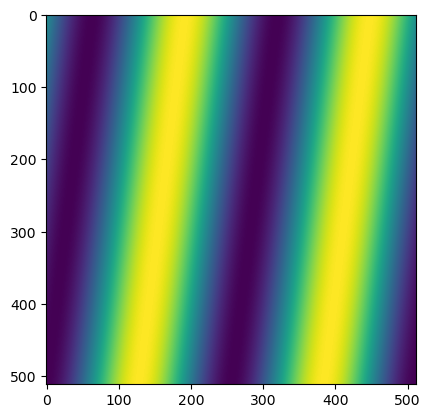

In [7]:
core.snap_image()
tagged_image = core.get_tagged_image()
pixels = np.reshape(tagged_image.pix,
                        newshape=[tagged_image.tags['Height'], tagged_image.tags['Width']])
plt.imshow(pixels)

In [8]:
type(pixels)

numpy.ndarray

In [9]:
def get_2dmaxima(image,kernelsize=3):
    """Get maximas of local image

        Parameters:
        image (ndarray): image to get localmaximas of
        kernelsize (int): size of filter used to find local maximas

        Returns:
        ndarray: local maximas of image
    """
    return image == maximum_filter(image, footprint=np.ones((kernelsize,kernelsize)))


In [10]:

def get_coord_maxima(image):
    """Get coordinates of local maximas

        Parameters:
        image (ndarray): local maximas

        Returns: list of local maxima coordinates
        
    """
    index = np.where(image!= 0)
    coord = list(zip(index[0], index[1]))
    return coord

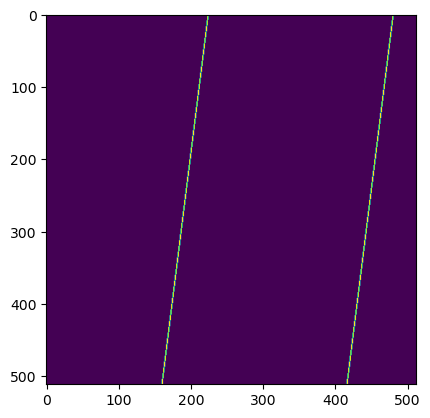

In [6]:
im = get_2dmaxima(pixels)
plt.imshow(im)